# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

In [1]:
import xlwings as xw

In [2]:
wb = xw.Book('./data/себестоимостьА_в1.xlsx')

xw.Range("T7:T10").formula = '=SUMPRODUCT(G7:O7,G$14:O$14)'
xw.Range('T4').value = 'Себестоимость'
xw.Range('T4').columns[0].autofit()
xw.Range('T7:T10').value

[21.48, 16.525, 17.423000000000002, 18.085]

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

In [3]:
# from appscript import k

In [4]:
xw.Range('T4:T6').merge(across=False)
xw.Range('S3:T3').merge(across=False)


xw.Range('T4').color = (245, 192, 0)
xw.Range('T7:T10').color = (255, 255, 167)
xw.Range('T4').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter
xw.Range('T4').api.VerticalAlignment = xw.constants.HAlign.xlHAlignCenter

xw.Range('T4').font.color = "#ffffff"
xw.Range('T4').font.bold = True

xw.Range('T4:T11').api.Borders.Weight = 2
xw.Range('T4:T10').api.Borders.Weight = 2
# xw.Range('T4:T11').api.get_border(which_border=k.border_top).weight.set(2)
# xw.Range('T4:T10').api.get_border(which_border=k.border_right).weight.set(2)

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [5]:
import numpy as np
import pandas as pd

In [57]:
recipes = pd.read_csv(
    './data/recipes_sample.csv', 
    delimiter=',', 
    usecols=['id', 'name', 'minutes', 'submitted', 'description', 'n_ingredients']
)
reviews = pd.read_csv('./data/reviews_sample.csv', delimiter=',', index_col=0)
recipes

,name,id,minutes,submitted,description,n_ingredients
0,george s at the cove black bean soup,44123,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,2007-11-25,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,2004-11-03,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,2012-08-29,this is a delicious soup that i originally fou...,NaN


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [58]:
recipes_5 = recipes.iloc[np.random.choice(len(recipes), int(len(recipes)*0.05), replace=False)]
reviews_5 = reviews.iloc[np.random.choice(len(reviews), int(len(reviews)*0.05), replace=False)]

writer = pd.ExcelWriter('./recipes.xlsx', engine='xlsxwriter')

recipes_5.to_excel(writer, sheet_name='Рецепты', index=False)
reviews_5.to_excel(writer, sheet_name='Отзывы')

writer.close()

reviews_5

,user_id,recipe_id,date,rating,review
149986,144373,418912,2010-05-28,5,Made this for dinner last night. Served it bo...
153729,71324,93223,2007-03-05,5,A great simple way to do croutons. I had some ...
612007,2000760542,238994,2015-12-21,5,AMAZING! I will never make crab legs any othe...
337009,826306,3929,2009-06-23,3,Chicken turned out ok. I used split chicken br...
518809,2002252836,54715,2018-09-24,0,I understood the recipe. Or does not mean both.
...,...,...,...,...,...
162549,169430,383425,2009-08-31,5,These are so simple to put together and utterl...
1023638,209441,323657,2009-01-05,5,"Loved this Kitty, used half ground pork and be..."
1057397,553782,192719,2007-09-27,5,WOW!!!!!\nAbsolutely fantastic. I love pineapp...
208275,665137,107150,2011-01-25,5,Elegant looking cookie with very little effort...


3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [59]:
wb = xw.Book('recipes.xlsx')
sht = wb.sheets['Рецепты']

sht.range('G1').value = 'seconds_assign'

seconds = np.array(sht.range('C2:C1501').value)*60

sht.range('G2').options(transpose=True).value = seconds

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [60]:
wb = xw.Book('recipes.xlsx')
sht = wb.sheets['Рецепты']

sht.range('H1').value = 'seconds_formula'
sht.range("H2:H1501").formula = '=$C2*60'
sht.range('H1').columns[0].autofit()

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [61]:
xw.Range('G1:H1').font.bold = True
xw.Range('G1:H1').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [62]:
for cell in sht.range('C2:C1501'):
    minute = cell.value
    if minute < 5:
        cell.color = (0, 255, 0)
    elif 5 <= minute < 10:
        cell.color = (255, 255, 0)
    else:
        cell.color = (255, 0, 0)       

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [63]:
sht_reviews = wb.sheets['Отзывы']

sht.range('I1').value = 'n_reviews'
sht.range('I2:I1501').formula = '=COUNTIF(Отзывы!C:C,B2)'

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [64]:
def validate(rating, id_review, recipe_id_set):
    return (rating <= 0 or rating >= 5) and id_review not in recipe_id_set

recipe_id_set = sht.range('B2:B1501').value

for i in range(2, 1502):
    if validate(sht_reviews.range(f'E{i}').value, sht_reviews.range(f'C{i}').value, recipe_id_set):
        sht_reviews.range(f'B{i}:F{i}').color = (255, 0, 0)


9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [65]:
import csv

In [66]:
with open("./data/recipes_model.csv", encoding="utf-8") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter="\t")
    wb = xw.Book("recipes.xlsx")
    sht = wb.sheets.add("Модель")
    sht.range("A2").value = list(csv_reader)

![image.png](screenshots/screen1.jpg)

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [72]:
wb = xw.Book("recipes.xlsx")
sht = wb.sheets["Модель"]
last_row = sht.api.UsedRange.Rows.Count
formula = (
    '=CONCATENATE(B2, " ", UPPER(C2), '
    'IF(G2 = "PK", " PRIMARY KEY ",'
    'IF(G2 = "FK", CONCATENATE("REFERENCES ", H2, "(", I2, ")"), "")),'
    'IF(AND(G2 <> "PK", D2="Y"), " NOT NULL ", ""))'
)
sht.range(f"J2:J{last_row + 1}").formula = formula

![image.png](screenshots/screen2.jpg)

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [73]:
sht.range('A1:J1').value = ['Таблица','Атрибут','Тип данных','Обязательно',
                            'Таблица (ru)','Атрибут (ru)',
                            'Ключ','Ссылочная таблица','Ссылочный ключ','SQL']

sht.range('A1:J1').color = '00ccff'
sht.range('A1:J1').font.bold = True
sht.range('A1:J18').columns.autofit()

In [81]:
wb.save()

![image.png](screenshots/screen3.jpg)

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

In [85]:
df_recipes = pd.read_excel('recipes.xlsx', sheet_name=0)

stats = df_recipes.groupby('Таблица')['Атрибут'].count()

wb = xw.Book("recipes.xlsx")
sht = wb.sheets.add("Статистика")
sht.range("A1").value = stats
stats

Таблица
recipe    8
review    6
user      3
Name: Атрибут, dtype: int64

In [49]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Количество аттрибутов')

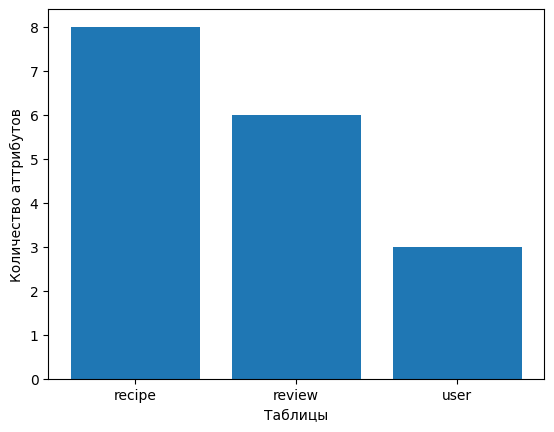

In [51]:
fig = plt.figure()
plt.bar(stats.index, stats.values)
plt.xlabel('Таблицы')
plt.ylabel('Количество аттрибутов')

In [ ]:
sht.pictures.add(fig, name='Statistics', update=True, left=sht.range('E2').left)

![](./таблица_4.png)